<a href="https://colab.research.google.com/github/hiranshree/AIML/blob/main/20211CCS0153_LABSHEET_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a data frame and visualize the natural groupings in the dataset

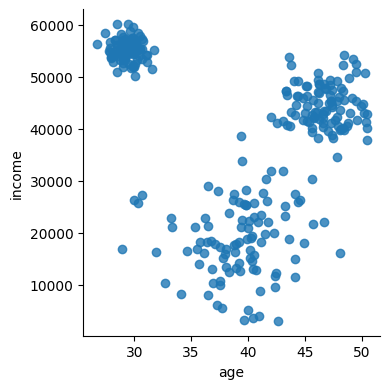

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv("/content/Income Data.csv")
sn.lmplot(x="age", y="income", data = df, fit_reg = False, height = 4)

# The above groupings are mostly segmented using income, since it has a huge range. Scale of age is 0 to 60 and income is from 0 to 50000. Hence Euclidean distance will always be dominated by income and not age. Hence all features need to be normalised to a uniform scale before clustering.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[["age", "income"]])
scaled_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

# Plotting customers with their segments

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


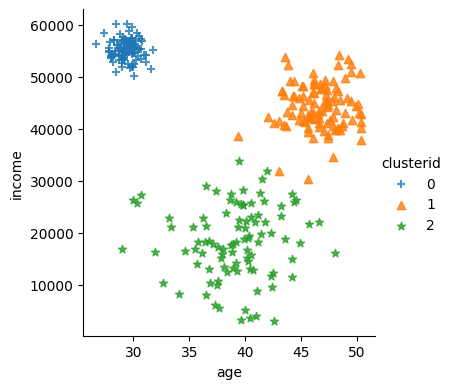

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(scaled_df)
df["clusterid"] = clusters.labels_
markers = ['+', '^', '*']
sn.lmplot(x="age", y="income", data = df, hue = "clusterid", fit_reg = False, markers  = markers, height = 4)

# Print the cluster centers using the original dataframe. Cluster centres explain the characteristics of the cluster and helps us to interpret the clusters. Print the cluster centres to understand the average age and income of each cluster.

In [ ]:
clusters = KMeans(3)
clusters.fit(df)
df["new_clusterid"] = clusters.labels_
df.groupby("new_clusterid")['age', 'income'].agg(["mean", 'std']).reset_index()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-20-39847d9fd428>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("new_clusterid")['age', 'income'].agg(["mean", 'std']).reset_index()


new_clusterid        age                  income             
                      mean       std          mean          std
0             0  39.174479  3.626068  18144.791667  6745.241906
1             1  31.700435  6.122122  54675.652174  2362.224320
2             2  46.419101  2.289620  43053.932584  3613.769632

# So Cluster 0 has a mean age of 39 and income of 18K. Low age and low income.
#   CLuster 1 has a mean age of 37 and income of 54K. Mid age and high income.
#   CLuster 2 has a mean age of 46 and income of 43K. High age and medium income. The actual age and income of a customer within a cluster will vary from the cluster centers and is called the cluster variance. This is given by WCSS - within cluster sum of squares.



# Find the optimum number of clusters that may exist using Elbow Method. Try with number of clusters from 1 to 10. In each case print the total variance using "inertia" parameter of the clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Sum of Squared Error')

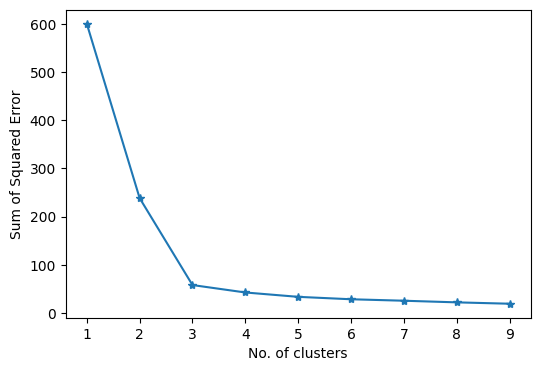

In [ ]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(scaled_df)
  cluster_errors.append(clusters.inertia_)
plt.figure(figsize = (6,4))
plt.plot(cluster_range, cluster_errors, marker = "*")
plt.xlabel("No. of clusters")
plt.ylabel("Sum of Squared Error")